In [1]:
import json

In [2]:
import csv

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
from sklearn import svm

In [9]:
from sklearn import metrics

In [10]:
import pickle

In [11]:
from sklearn import naive_bayes

In [12]:
from IPython.display import Image

In [13]:
from sklearn.model_selection import StratifiedKFold

In [14]:
from sklearn import ensemble

In [15]:
from sklearn import tree

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
import scikitplot as skplt

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.metrics import f1_score

In [21]:
import scikitplot as skplt

## With currency category i.e. concepts, entities, keywords

In [22]:
vocab_file='dataset.csv'
label_file='label1.csv'
df= pd.read_csv(vocab_file)
df2=pd.read_csv(label_file)
print(df.shape)
print(df2.shape)
print(df.values)
#df2
label_dict={'not spam': 1, 'spam': 0}
df2['news-label']= df2['news-label'].map(label_dict)
y=df2['news-label']
#print(y)
#x= df
#print(x)

(3033, 10991)
(3033, 1)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29930000e+04
  4.84022556e-01 2.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.60000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.65900000e+03
  3.90753880e-01 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.30260000e+04
  6.00000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.04800000e+04
  3.75587094e-01 4.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.42430000e+04
  3.50455182e-01 1.00000000e+00]]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size = 0.30)
print(X_train.shape)# print(X_train_dtm.shape[0])
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2123, 10991)
(910, 10991)
(2123,)
(910,)


In [24]:
import pandas as pd
df= pd.DataFrame(X_train)
df.to_csv('hv/1.csv')
df1= pd.DataFrame(X_test)
df1.to_csv('hv/2.csv')
df2= pd.DataFrame(Y_train)
df2.to_csv('hv/3.csv')
df4= pd.DataFrame(Y_test)
df4.to_csv('hv/4.csv')

In [25]:
vocab_file='hv/1.csv'
label_file='hv/3.csv'
df= pd.read_csv(vocab_file)
df2=pd.read_csv(label_file)
print(df.shape)
print(df2.shape)
print(df.values)

(2123, 10991)
(2123, 1)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.28468548e-01 4.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.15277778e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.55000000e+03
  2.02083333e-01 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.23870000e+04
  4.44444444e-01 2.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.86480000e+04
  3.92669173e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.85330000e+04
  3.57812500e-01 6.00000000e+00]]


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
0.931924882629108
0.9411764705882353
0.9481132075471698
0.9339622641509434
0.9292452830188679
Gradient Boosting Classifier: 
Accuracy score is :                 93.68844215868648

Micro precision score is:           93.68844215868648
Macro precision score is:           93.35822023451813
Weighted precision score is:        93.7189369679261

Micro Recall score is:              93.68844215868648
Macro Recall score is:              92.94037318031127
Weighted Recall score is:           93.68844215868648

Micro f1 score is:                  93.68844215868648
Macro f1 score is:                  93.11569386665258
Weighted f1 score is:               93.67525882335866


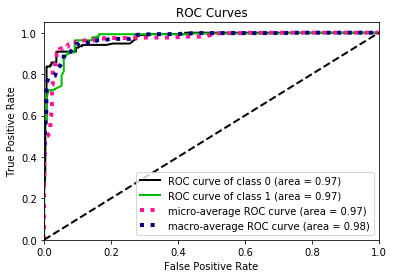

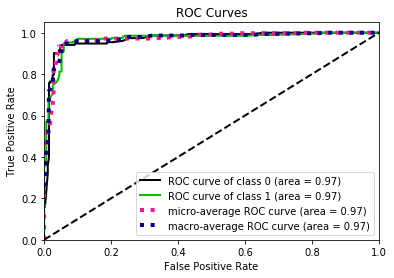

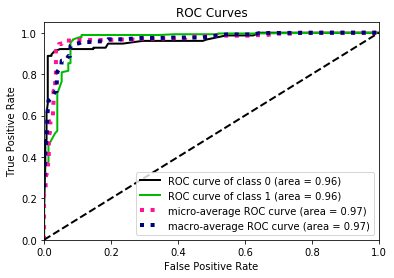

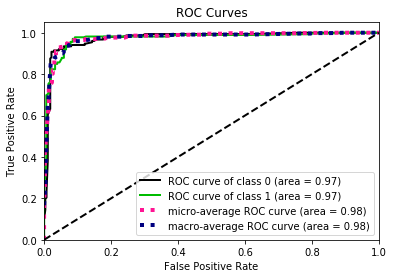

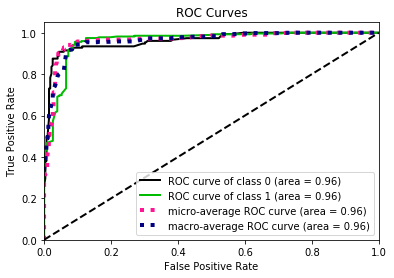

In [27]:
y=df2['news-label']
model_accuracy=0
accuracy_sum=0

precision_micro_sum=0
precision_macro_sum=0
precision_weighted_sum=0

recall_micro_sum=0
recall_macro_sum=0
recall_weighted_sum=0

f1_micro_sum=0
f1_macro_sum=0
f1_weighted_sum=0

clf= ensemble.GradientBoostingClassifier()
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
#Accuracy calculation    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    accuracy_sum=accuracy_sum+accuracy   
    if accuracy>model_accuracy:
        clf1=clf
        y_pred=clf1.predict(x_test)
        accuracy=metrics.accuracy_score(y_test, y_pred)
#Precision calculation
    precision_micro=metrics.precision_score(y_test,y_pred, average='micro')
    print(precision_micro)
    precision_micro_sum=precision_micro_sum+precision_micro
    precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    precision_macro_sum=precision_macro_sum+precision_macro
    precision_weighted=metrics.precision_score(y_test,y_pred, average='weighted')
    precision_weighted_sum=precision_weighted_sum+precision_weighted
#recall calculation    
    recall_micro= metrics.recall_score(y_test, y_pred, average='micro')
    recall_micro_sum= recall_micro_sum+recall_micro
    recall_macro= metrics.recall_score(y_test, y_pred, average='macro')
    recall_macro_sum= recall_macro_sum+recall_macro    
    recall_weighted= metrics.recall_score(y_test, y_pred, average='weighted')
    recall_weighted_sum= recall_weighted_sum+recall_weighted    
#f1 calculation
    f1_micro=f1_score(y_test, y_pred, average='micro')
    f1_micro_sum=f1_micro_sum+f1_micro
    f1_macro=f1_score(y_test, y_pred, average='macro')
    f1_macro_sum=f1_macro_sum+f1_macro
    f1_weighted=f1_score(y_test, y_pred, average='weighted')
    f1_weighted_sum=f1_weighted_sum+f1_weighted
#ROC curve    
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)

        
    
#accuracy average    
accuracy_average= accuracy_sum/5
#precision average
precision_micro_average=precision_micro_sum/5
precision_macro_average=precision_macro_sum/5
precision_weighted_average=precision_weighted_sum/5
#recall average
recall_micro_average=recall_micro_sum/5
recall_macro_average=recall_macro_sum/5
recall_weighted_average=recall_weighted_sum/5
#f1 average
f1_micro_average=f1_micro_sum/5
f1_macro_average=f1_macro_sum/5
f1_weighted_average=f1_weighted_sum/5

print('Gradient Boosting Classifier: ')
print('Accuracy score is :                ',accuracy_average*100)
print("")
print('Micro precision score is:          ',precision_micro_average*100)
print('Macro precision score is:          ',precision_macro_average*100)
print('Weighted precision score is:       ',precision_weighted_average*100)
print("")
print('Micro Recall score is:             ',recall_micro_average*100)
print('Macro Recall score is:             ',recall_macro_average*100)
print('Weighted Recall score is:          ',recall_weighted_average*100)
print("")
print('Micro f1 score is:                 ', f1_micro_average*100)
print('Macro f1 score is:                 ', f1_macro_average*100)
print('Weighted f1 score is:              ', f1_weighted_average*100)
#accuracy_average= accuracy_sum/5    
#print(accuracy_average*100)  
#df.iloc[train_index]

In [29]:
vocab_file='hv/2.csv'
label_file='hv/4.csv'
dftrain= pd.read_csv(vocab_file)
dfy=pd.read_csv(label_file)
print(dftrain.shape)
print(dfy.shape)
print(dftrain.values)
y_pred=clf.predict(dftrain)
accuracy=metrics.accuracy_score(dfy, y_pred)
print(accuracy*100)

(910, 10991)
(910, 1)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.30260000e+04
  3.94209957e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.49964986e-01 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.28910000e+04
  3.85586527e-01 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.57051282e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.64130000e+04
  3.00000000e-01 3.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.18780000e+04
  4.24455767e-01 3.00000000e+00]]
93.95604395604396


## Authority

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
0.9413145539906104
0.9411764705882353
0.9386792452830188
0.9504716981132075
0.9127358490566038
Decision Tree Classifier: 
Accuracy score is :                 93.68755634063352

Micro precision score is:           93.68755634063352
Macro precision score is:           93.30150760776668
Weighted precision score is:        93.7138942225394

Micro Recall score is:              93.68755634063352
Macro Recall score is:              92.99801870815804
Weighted Recall score is:           93.68755634063352

Micro f1 score is:                  93.68755634063352
Macro f1 score is:                  93.12403456970934
Weighted f1 score is:               93.67887580505719


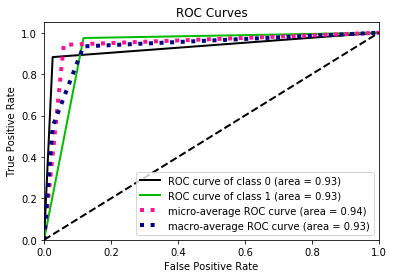

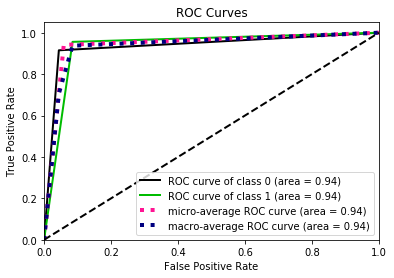

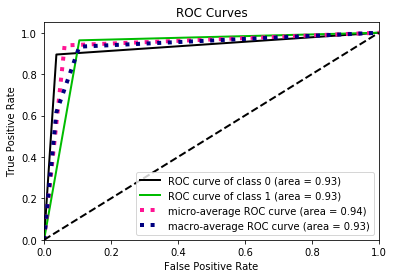

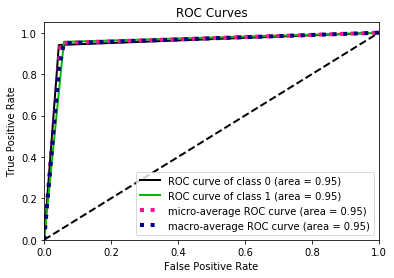

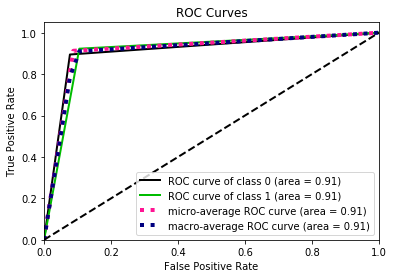

In [30]:
accuracy_sum=0
y=df2['news-label']
model_accuracy=0

precision_micro_sum=0
precision_macro_sum=0
precision_weighted_sum=0

recall_micro_sum=0
recall_macro_sum=0
recall_weighted_sum=0

f1_micro_sum=0
f1_macro_sum=0
f1_weighted_sum=0

clf= DecisionTreeClassifier(random_state=0)
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(df, y)
print(skf)
for train_index, test_index in skf.split(df, y):
    x_train, x_test= df.iloc[train_index], df.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
#Accuracy calculation    
    accuracy=metrics.accuracy_score(y_test, y_pred)
    accuracy_sum=accuracy_sum+accuracy 
    if accuracy>model_accuracy:
        clf1=clf
        y_pred=clf1.predict(x_test)
        accuracy=metrics.accuracy_score(y_test, y_pred)
#Precision calculation
    precision_micro=metrics.precision_score(y_test,y_pred, average='micro')
    print(precision_micro)
    precision_micro_sum=precision_micro_sum+precision_micro
    precision_macro=metrics.precision_score(y_test,y_pred, average='macro')
    precision_macro_sum=precision_macro_sum+precision_macro
    precision_weighted=metrics.precision_score(y_test,y_pred, average='weighted')
    precision_weighted_sum=precision_weighted_sum+precision_weighted
#recall calculation    
    recall_micro= metrics.recall_score(y_test, y_pred, average='micro')
    recall_micro_sum= recall_micro_sum+recall_micro
    recall_macro= metrics.recall_score(y_test, y_pred, average='macro')
    recall_macro_sum= recall_macro_sum+recall_macro    
    recall_weighted= metrics.recall_score(y_test, y_pred, average='weighted')
    recall_weighted_sum= recall_weighted_sum+recall_weighted    
#f1 calculation
    f1_micro=f1_score(y_test, y_pred, average='micro')
    f1_micro_sum=f1_micro_sum+f1_micro
    f1_macro=f1_score(y_test, y_pred, average='macro')
    f1_macro_sum=f1_macro_sum+f1_macro
    f1_weighted=f1_score(y_test, y_pred, average='weighted')
    f1_weighted_sum=f1_weighted_sum+f1_weighted
#ROC curve    
    y_pred= clf.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, y_pred)

        
    
#accuracy average    
accuracy_average= accuracy_sum/5
#precision average
precision_micro_average=precision_micro_sum/5
precision_macro_average=precision_macro_sum/5
precision_weighted_average=precision_weighted_sum/5
#recall average
recall_micro_average=recall_micro_sum/5
recall_macro_average=recall_macro_sum/5
recall_weighted_average=recall_weighted_sum/5
#f1 average
f1_micro_average=f1_micro_sum/5
f1_macro_average=f1_macro_sum/5
f1_weighted_average=f1_weighted_sum/5

print('Decision Tree Classifier: ')
print('Accuracy score is :                ',accuracy_average*100)
print("")
print('Micro precision score is:          ',precision_micro_average*100)
print('Macro precision score is:          ',precision_macro_average*100)
print('Weighted precision score is:       ',precision_weighted_average*100)
print("")
print('Micro Recall score is:             ',recall_micro_average*100)
print('Macro Recall score is:             ',recall_macro_average*100)
print('Weighted Recall score is:          ',recall_weighted_average*100)
print("")
print('Micro f1 score is:                 ', f1_micro_average*100)
print('Macro f1 score is:                 ', f1_macro_average*100)
print('Weighted f1 score is:              ', f1_weighted_average*100)
#accuracy_average= accuracy_sum/5    
#print(accuracy_average*100)  
#df.iloc[train_index]

In [31]:
vocab_file='hv/2.csv'
label_file='hv/4.csv'
dftrain= pd.read_csv(vocab_file)
dfy=pd.read_csv(label_file)
print(dftrain.shape)
print(dfy.shape)
print(dftrain.values)
y_pred=clf.predict(dftrain)
accuracy=metrics.accuracy_score(dfy, y_pred)
print(accuracy*100)

(910, 10991)
(910, 1)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.30260000e+04
  3.94209957e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.49964986e-01 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.28910000e+04
  3.85586527e-01 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.57051282e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.64130000e+04
  3.00000000e-01 3.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.18780000e+04
  4.24455767e-01 3.00000000e+00]]
93.4065934065934
